In [1]:
# Importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#from xgboost import XGBClassifier
#from xgboost import XGBRegressor
#from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

In [3]:
# Reading csv file into pandas dataframe
df = pd.read_csv('/Users/bmarty/Downloads/heart.csv.xls')

In [5]:
# Viewing first 5 rows
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
# Displaying pertinent info about the columns and data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [9]:
# Viewing column metrics
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [11]:
# Calculating percentage of patients with heart disease
df['HeartDisease'].value_counts(normalize=True)*100

HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64

In [15]:
# Finding averages of categories based on whether patient has heart disease
df.groupby(['HeartDisease'])[['Age', 'Cholesterol', 'RestingBP']].agg('mean', 'median')

,Age,Cholesterol,RestingBP
HeartDisease,,,
0,50.551220,227.121951,130.180488
1,55.899606,175.940945,134.185039


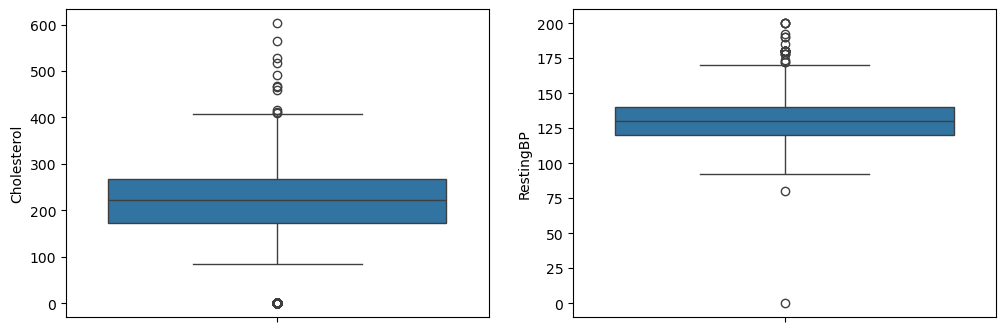

In [193]:
# EDA using visualizations for a closer look at the data
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.boxplot(data=df, y='Cholesterol', ax=ax[0])
sns.boxplot(data=df, y='RestingBP', ax=ax[1])
plt.show()

<Axes: xlabel='FastingBS', ylabel='Count'>

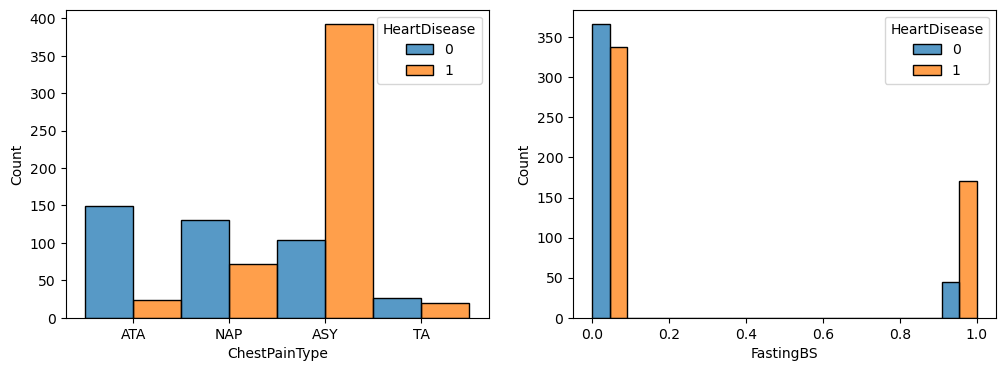

In [191]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=df, x='ChestPainType', hue='HeartDisease', multiple='dodge', ax=ax[0])
sns.histplot(data=df, x='FastingBS', hue='HeartDisease', multiple='dodge', ax=ax[1])

<Axes: xlabel='RestingECG', ylabel='Count'>

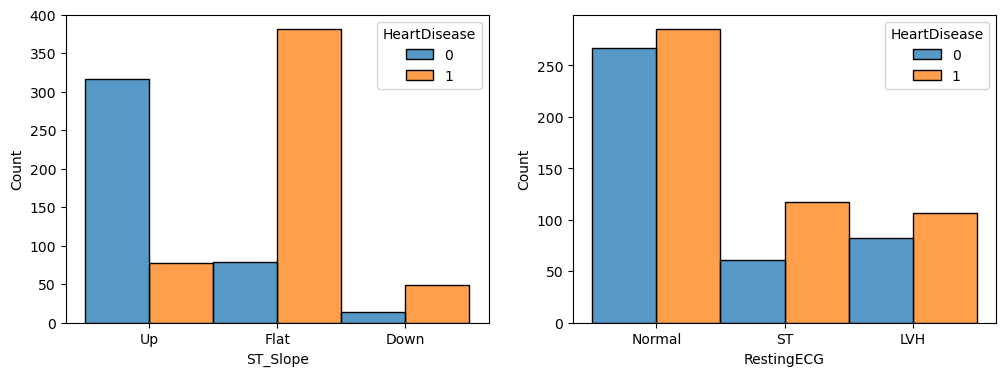

In [195]:
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.histplot(data=df, x='ST_Slope', hue='HeartDisease', multiple='dodge', ax=ax[0])
sns.histplot(data=df, x='RestingECG', hue='HeartDisease', multiple='dodge', ax=ax[1])

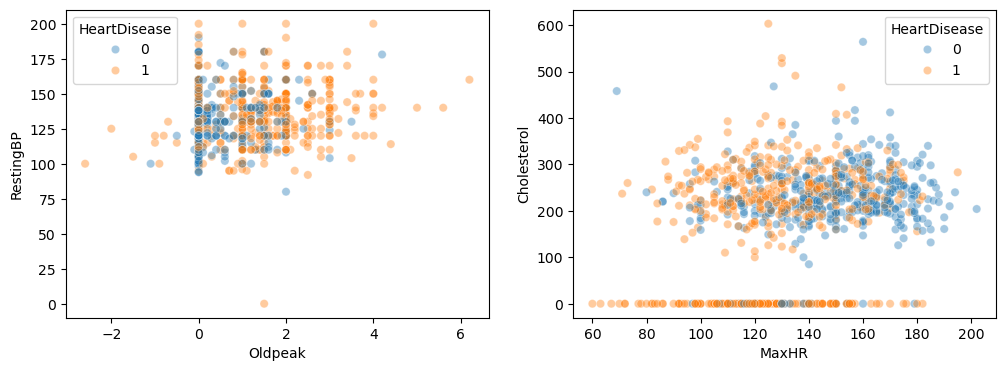

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(data=df, x='Oldpeak', y='RestingBP', hue='HeartDisease', alpha=0.4, ax=ax[0])
sns.scatterplot(data=df, x='MaxHR', y='Cholesterol', hue='HeartDisease', alpha=0.4, ax=ax[1])
plt.show()

In [35]:
# Determining heart disease values grouped by type of chest pain
df.groupby(['ChestPainType'])['HeartDisease'].value_counts()

ChestPainType  HeartDisease
ASY            1               392
               0               104
ATA            0               149
               1                24
NAP            0               131
               1                72
TA             0                26
               1                20
Name: count, dtype: int64

In [37]:
# Repeating above with Resting ECG category
df.groupby(['RestingECG'])['HeartDisease'].value_counts()

RestingECG  HeartDisease
LVH         1               106
            0                82
Normal      1               285
            0               267
ST          1               117
            0                61
Name: count, dtype: int64

In [185]:
# Returning the number of potential errors in "RestingBP" and "Cholesterol"
print((df['RestingBP'] == 0).sum())
print((df['Cholesterol'] == 0).sum())

1
172


In [39]:
# Assigning dummy variables
df2 = pd.get_dummies(df, dtype=int)

In [41]:
df2.head(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1


In [43]:
# Removing rows with 0 values
df3 = df2[(['Cholesterol'] != 0) & (df2['RestingBP'] != 0)]

In [45]:
# Checking the number of rows to verify removal
len(df3)

917

<Axes: >

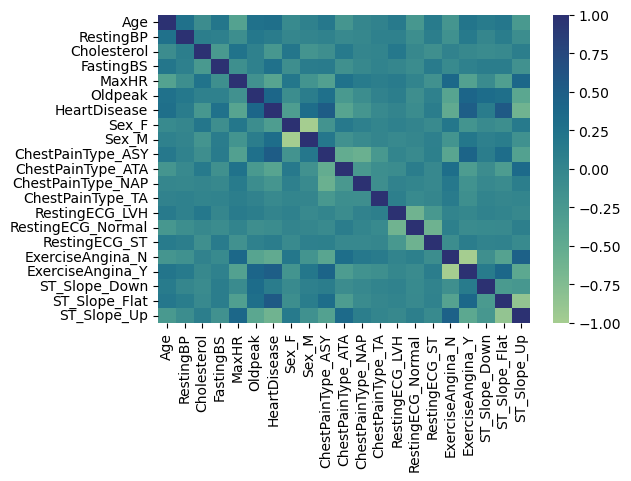

In [63]:
# Viewing correlations using heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data=df3.corr(numeric_only=True), cmap='crest')

In [67]:
# Separating the dataset into Dependent and independent variables
y = df3['HeartDisease']
X = df3[['Age', 'Oldpeak', 'ChestPainType_ASY', 'FastingBS', 'ST_Slope_Flat']]

In [69]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [71]:
# Setting regression parameters and fitting training set
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [75]:
# Predicting y value
y_pred = log_clf.predict(X_test)

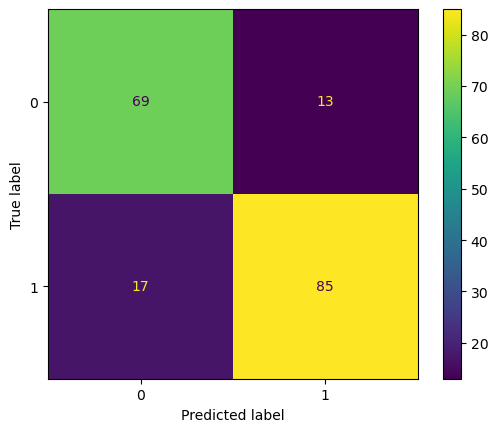

In [79]:
# Constructing Confusion Matrix to display predictive results
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

log_disp.plot(values_format='')
plt.show()

In [81]:
# Create classification report for model
target_names = ['Predicted to Have Heart Disease', 'Predicted to Not Have Heart Disease']
print(classification_report(y_test, y_pred, target_names=target_names))

                                     precision    recall  f1-score   support

    Predicted to Have Heart Disease       0.80      0.84      0.82        82
Predicted to Not Have Heart Disease       0.87      0.83      0.85       102

                           accuracy                           0.84       184
                          macro avg       0.83      0.84      0.84       184
                       weighted avg       0.84      0.84      0.84       184



In [158]:
# Creating tree based model and setting Cross Validation parameters
tree = DecisionTreeClassifier(random_state=0)

cv_params = {
    'max_depth':[4,6,8,None],
    'min_samples_leaf': [2,5,1],
    'min_samples_split': [2,4,6]
}

tree1 = GridSearchCV(tree, cv_params, cv=4, refit='f1')

In [160]:
# Fitting the model
%%time
tree1.fit(X_train, y_train)

CPU times: user 189 ms, sys: 3.2 ms, total: 192 ms
Wall time: 191 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='f1')

In [162]:
# Returning best parameters from model
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [164]:
# Returning best score from model
tree1.best_score_

0.8376321572820147

In [172]:
# Creating a table to display metrics
table = pd.DataFrame({'accuracy' : [accuracy_score(y_test, y_pred)],
                    'precision': [precision_score(y_test, y_pred)],
                    'f1': [f1_score(y_test, y_pred)],
                    'recall': [recall_score(y_test, y_pred)]
                     })
print(table)

   accuracy  precision    f1    recall
0  0.836957   0.867347  0.85  0.833333


[Text(0.5, 0.875, 'ST_Slope_Flat <= 0.5\ngini = 0.494\nsamples = 733\nvalue = [328, 405]'),
 Text(0.25, 0.625, 'ChestPainType_ASY <= 0.5\ngini = 0.392\nsamples = 362\nvalue = [265, 97]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'Oldpeak <= 1.95\ngini = 0.135\nsamples = 220\nvalue = [204, 16]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'Oldpeak <= 0.45\ngini = 0.49\nsamples = 142\nvalue = [61, 81]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'ChestPainType_ASY <= 0.5\ngini = 0.282\nsamples = 371\nvalue = [63.0, 308.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'Oldpeak <= 0.05\ngini = 0.45\nsamples = 111\nvalue = [38, 73]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'FastingBS <= 0.5\ngini = 0.174\nsamples = 260\nvalue = [25, 235]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (..

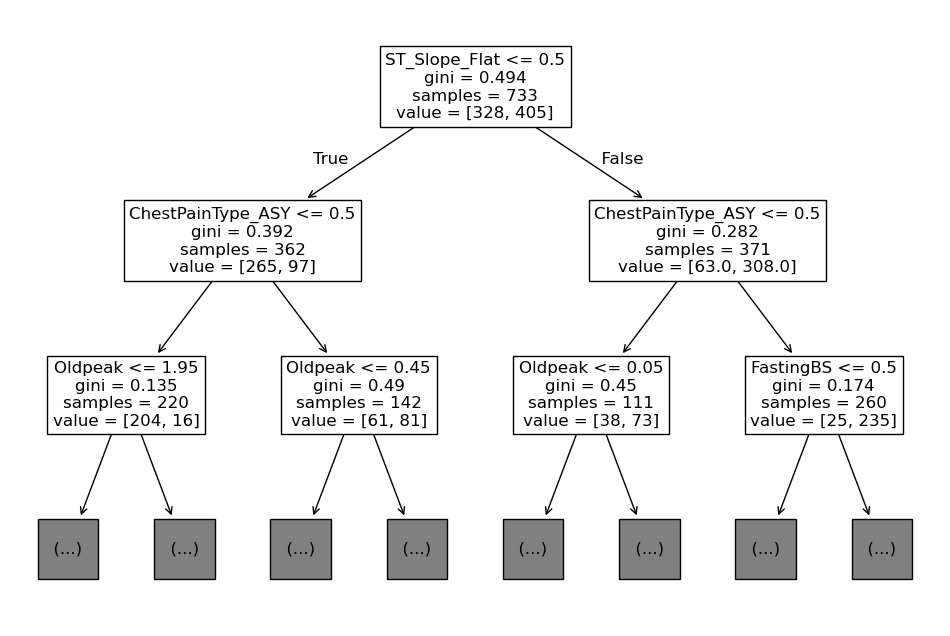

In [176]:
# Plotting Best Estimator Tree
plt.figure(figsize=(12,8))
plot_tree(tree1.best_estimator_, max_depth=2, fontsize=12, feature_names=X.columns)